In [57]:
import cv2
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from Thresholding import otsu
from Boundaries import boundaries_detection
from Boundaries import freeman_chain_code
from Borders import border_detection
class Image:
    def __init__(self,data,label,rotated=False,resized=False):
        self.data = data
        self.borderImage = None
        self.label = label
        self.boundary = None
        self.boundaryImage = None
        self.rotated = rotated
        self.resized = resized

    def __str__(self) -> str:
        return f"{self.data}"

    def getBoundaries(self)->None:
        binaryImage = otsu.otsu_image(self.data)
        self.borderImage = border_detection.canny_bordering(binaryImage)
        self.boundaryImage,self.boundary = boundaries_detection.moore_boundary_detection(self.borderImage)

    def getFreemanChain(self):
        if(self.boundary is None):
            self.getBoundaries()
        freemanChainCode = freeman_chain_code.calculate_chain_code(self.boundaryImage)
        self.freemanChainCode = freeman_chain_code.normalize_chain(freemanChainCode)

    def getArea(self):
        rows,columns = self.data.shape
        area = 0
        for r in range(rows):
            for c in range(columns):
                if(self.data[r][c] == 255):
                    area += 1
        self.area = area

    def getPerimeter(self):
        if(self.freemanChainCode is None):
            self.getFreemanChain()
        perimeter = 0
        for value in self.freemanChainCode:
            if(value%2 == 0):
                perimeter += 1
            else:
                perimeter += math.sqrt(2)
        self.perimeter = perimeter
        
    def getCompactness(self):
        if(self.perimeter is None):
            self.getPerimeter()
        if(self.area is None):
            self.getArea()
        self.compactness = self.perimeter**2 / self.area

    def getRectangularity(self):
        rows,columns = self.data.shape
        points = [math.inf,-1,math.inf,-1] # heighleast,heighmost,leftmost,rightmost
        for r in range(rows):
            for c in range(columns):
                if(self.data[r][c] == 255):
                    if(r < points[0]):
                        points[0] = r
                    if(r > points[1]):
                        points[1] = r
                    if(c < points[2]):
                        points[2] = c
                    if(c > points[3]):
                        points[3] = c
        areaR = (points[1]-points[0]) * (points[3]-points[2])
        self.rectangularity = self.area/areaR
        

    def plotImage(self):
        plt.figure()
        plt.subplot(131)
        plt.imshow(self.data,cmap="gray")
        plt.subplot(132)
        plt.imshow(self.borderImage,cmap="gray")
        plt.subplot(133)
        plt.imshow(self.boundaryImage,cmap="gray")
        plt.show()


## Load data

In [58]:
images = []
imagesRotated = []
imagesResized = []
folder_path = 'images'
init_folders = os.listdir(folder_path)
for folder in init_folders:
    init_folder_path = os.path.join(folder_path, folder)
    cont = 0
    for image_path in os.listdir(init_folder_path):
        if(cont == 10):
            break
        image_folder = os.path.join(init_folder_path,image_path)
        image = cv2.imread(image_folder,cv2.IMREAD_GRAYSCALE)
        imageR = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
        imagesRZD = cv2.resize(image,(37,37),interpolation=cv2.INTER_NEAREST)
        images.append(Image(image,folder))
        imagesRotated.append(Image(imageR,folder,rotated=True))
        imagesResized.append(Image(imagesRZD,folder,resized=True))
        cont += 1

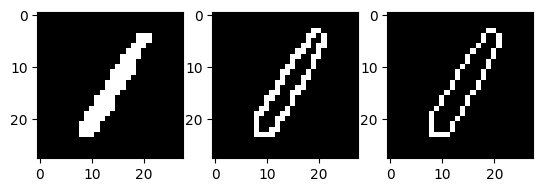

0.3117408906882591

In [62]:
image = images[12]
image.getFreemanChain()
image.plotImage()
image.getArea()
image.getPerimeter()
image.getCompactness()
image.getRectangularity()
image.rectangularity